<h1><center>LE PALUDISME DANS LE MONDE</center></h1>

<img src=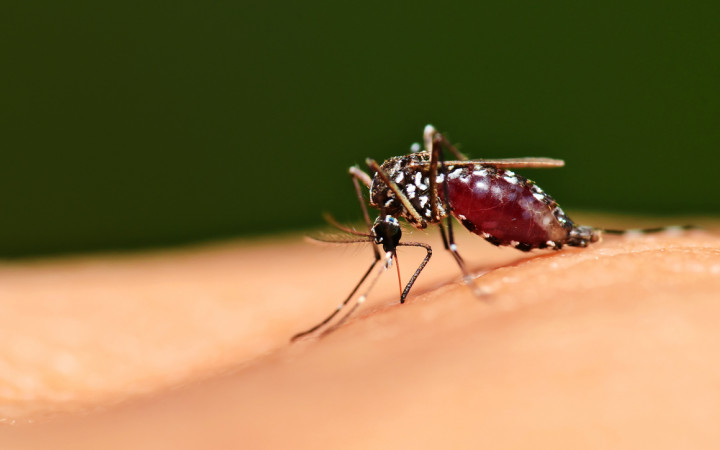

Le paludisme ou la malaria ou encore "fièvre des marais" est une maladie infectueuse causée par un parasite transmis à l'homme par la piqure d'un moustique infecté. Chaque année, plus de 200 millions de personnes contractent le paludisme et plus de 400 000 personnes en meurent. La catégorie la plus touchée dans le monde sont les jeunes africains. 
La maladie est principalement présente dans les zones tropicales et subtropicales. L'OMS met en place des mesures afin de réduire l'incidence du paludisme. 

**Symptomes :**
* fièvre
* maux de tête
* douleures musculaires
* affaiblissement
* vomissements
* diarrhées
* toux

**Cause** 

Le paludisme est une maladie infectieuse potentiellement mortelle due à plusieurs espèces de parasites appartenant au genre Plasmodium. Le parasite est transmis à l’homme par la piqûre de moustiques infectés. Ces moustiques, « vecteurs » du paludisme,  appartiennent tous au genre Anopheles.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import missingno as  msno
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv("/kaggle/input/malaria-dataset/reported_numbers.csv")
df.head().style.background_gradient(cmap='Reds')

In [ ]:
df.info()

**Vérifions si il y a des valeurs nulles**

In [ ]:
df.isnull().sum()

In [ ]:
n = msno.bar(df,color = "lightskyblue")

**Il y a donc des valeurs nulles. Supprimons les.**

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

**Visualisation de données**

**Comparons les résultats par rapport à chaque pays. Regroupons donc les données par pays.**

In [ ]:
df_group =df.groupby('Country')["No. of cases","No. of deaths"].sum().reset_index()
df_group.head()

In [ ]:
df_cases = df_group[["Country","No. of cases"]]
df_cases.head()

**Top 10 des pays avec la plus grande incidence du paludisme**

In [ ]:
pio.templates.default ='plotly_dark'
fig = px.bar(df_cases.sort_values("No. of cases",ascending=False)[:10][::-1],x="No. of cases",y ="Country",text="No. of cases",
             title="Top 10 des pays avec la plus grande incidence du paludisme de 2000 à 2018",
             color_discrete_sequence= px.colors.qualitative.Light24,height=900,orientation="h")#
fig.show()

**Top 10 des pays avec le plus grand nombre de décés dus au paludisme**

In [ ]:
df_death = df_group[["Country","No. of deaths"]]
pio.templates.default ='plotly_dark'
fig = px.bar(df_death.sort_values("No. of deaths",ascending=False)[:10][::-1],x="No. of deaths",y ="Country",text="No. of deaths",
             title="Top 10 des pays avec le plus grand nombre de décés de 2000 à 2018",
             color_discrete_sequence= px.colors.qualitative.Light24,height=800,orientation="h")
fig.show()

**Voyons les cas de paludisme au travers des régions de l'OMS**

In [ ]:
who_group =df.groupby('WHO Region')["No. of cases","No. of deaths"].sum().reset_index()
who_group.head().style.background_gradient(cmap ='Reds')

**L'incidence par région de l'OMS**

In [ ]:
pio.templates.default = "plotly_dark"
fig = px.bar(who_group.sort_values("No. of cases",ascending=False)[::-1],y="No. of cases",x ="WHO Region",text="No. of cases",
             title="Les régions de l'OMS avec la plus grande incidence de 2000 à 2018",
             color_discrete_sequence= px.colors.qualitative.Set1,height=500,orientation="v")
fig.show()

In [ ]:
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=who_group["WHO Region"],
                             values=who_group['No. of cases'])])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent',textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(width=800,
    height=600)
fig.show()

**Le nombre de décés par région de l'OMS**

In [ ]:
pio.templates.default = "plotly_dark"
fig = px.bar(who_group.sort_values("No. of deaths",ascending=False)[::-1],y="No. of deaths",x ="WHO Region",text="No. of deaths",
             title="Les régions de l'OMS avec le plus grand nombre de décés de 2000 à 2018",
             color_discrete_sequence= px.colors.qualitative.Set1,height=500,orientation="v")
fig.show()

In [ ]:
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=who_group["WHO Region"],
                                 values=who_group['No. of deaths'])])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent',textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(width=800,
    height=600)
fig.show()

**Voyons les résulats sur une carte proportionnelle**

In [ ]:
def plot_treemap_cases(dataframe,variable,value):
    fig = px.treemap(dataframe.sort_values(by=value,ascending=False).reset_index(drop=True),
                     path=[variable],values=value,title=("Répartition proportionnelle des cas de paludisme par pays de 2000 à 2018" "<br>"),
                     color_discrete_sequence = px.colors.qualitative.Set1)
    fig.data[0].textinfo = 'label+text+value'
    
    fig.show()
    
def plot_treemap_deaths(dataframe,variable,value):
    fig = px.treemap(dataframe.sort_values(by=value,ascending=False).reset_index(drop=True),
                     path=[variable],values=value,title=("Répartition proportionnelle du nombre de décés par pays de 2000 à 2018" "<br>"),
                     color_discrete_sequence = px.colors.qualitative.Set1)
    fig.data[0].textinfo = 'label+text+value'
    
    fig.show()

In [ ]:
plot_treemap_cases(df_group,"Country","No. of cases")

In [ ]:
plot_treemap_deaths(df_group,"Country","No. of deaths")

**Comparons maintenant ces valeurs selon les années**

In [ ]:
year_group= df.groupby("Year")[["No. of cases","No. of deaths"]].sum().reset_index()
year_group.head()

In [ ]:
#whole = df_n.groupby('Date')['Date','Confirmed','Deaths','Recovered','Active'].sum().reset_index()
fig = make_subplots(rows=1,cols=2,column_titles = ('No. of cases','No. of deaths'))

trace_1 = go.Scatter(x=year_group['Year'],y=year_group['No. of cases'],name='Cases',opacity=0.9,mode='lines+markers',line_color='blue')

trace_2 = go.Scatter(x=year_group['Year'],y=year_group['No. of deaths'],name='Deaths',opacity=0.9,mode='lines+markers',line_color='red')

fig.append_trace(trace_1,1,1)
fig.append_trace(trace_2,1,2)

fig.update_layout(title_text="Propagation du paludisme selon les années")
fig.show()

**Regardons les données au travers d'une carte**

In [ ]:
fig = px.choropleth(df_group,locationmode="country names",locations ="Country",hover_data = ["Country","No. of cases","No. of deaths"],
                    hover_name = "Country",color="Country",title="Le paludisme dans le Monde, carte des cas et des décés"
)
fig.show()

**Regardons la situation au Brésil**

In [ ]:
brazil = df[df["Country"] == "Brazil"]
brazil.tail()

In [ ]:
#whole = df_n.groupby('Date')['Date','Confirmed','Deaths','Recovered','Active'].sum().reset_index()
fig = make_subplots(rows=1,cols=2,column_titles = ('No. of cases','No. of deaths'))

trace_1 = go.Scatter(x=brazil['Year'],y=brazil['No. of cases'],name='Cases',opacity=0.9,mode='lines+markers',line_color='blue')

trace_2 = go.Scatter(x=brazil['Year'],y=brazil['No. of deaths'],name='Deaths',opacity=0.9,mode='lines+markers',line_color='red')

fig.append_trace(trace_1,1,1)
fig.append_trace(trace_2,1,2)

fig.update_layout(title_text="Vue d'ensemble du paludisme au Brésil")
fig.show()

<h1><center>MERCI</center></h1>